In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation, BatchNormalization
import PIL

In [3]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255, 
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    validation_split=0.20)    

training_dataset = image_generator.flow_from_directory(directory='/content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data', 
                                                       target_size=(200,200),
                                                       color_mode='grayscale',
                                                       batch_size = 32, 
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='/content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data', 
                                                         target_size=(200,200),
                                                         color_mode='grayscale',
                                                         batch_size = 32, 
                                                         subset="validation",
                                                         class_mode='categorical')

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


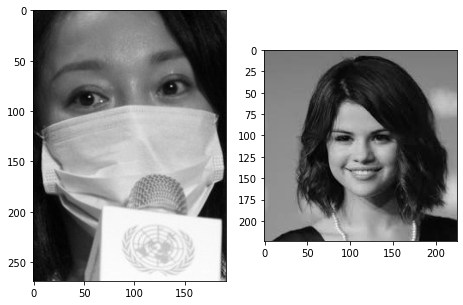

In [4]:
import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data/with_mask/50.jpg' ,1)
im2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data/without_mask/11.jpg', 1)


im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


fig = plt.figure(figsize=(20,10))

fig1 = fig.add_subplot(1,5,1)
fig2 = fig.add_subplot(1,5,2)

fig1.imshow(im1, cmap='gray')
fig2.imshow(im2, cmap='gray')

plt.show()

In [5]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=6)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3) ,input_shape=(200, 200, 1), activation='relu', padding='same')) #Convolution
model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
model.add(Dropout(0.05))
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
model.add(Dropout(0.05))
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
model.add(Dropout(0.05))
    
model.add(Flatten())
model.add(Dropout(0.6))
    
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=2, activation='softmax'))
    
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9

In [7]:
history = model.fit_generator(training_dataset, 
                              steps_per_epoch=2067//32, 
                              epochs=15,
                              validation_data=validation_dataset, 
                              validation_steps=766//32,
                              callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
54/64 [========================>.....] - ETA: 2:34 - loss: 0.6277 - accuracy: 0.6534

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


64/64 [==============================] - 1337s 21s/step - loss: 0.6129 - accuracy: 0.6672 - val_loss: 0.6340 - val_accuracy: 0.6087
Epoch 2/15
64/64 [==============================] - 326s 5s/step - loss: 0.4763 - accuracy: 0.7778 - val_loss: 0.5012 - val_accuracy: 0.7514
Epoch 3/15
64/64 [==============================] - 117s 2s/step - loss: 0.4009 - accuracy: 0.8238 - val_loss: 0.4565 - val_accuracy: 0.7717
Epoch 4/15
64/64 [==============================] - 51s 792ms/step - loss: 0.3312 - accuracy: 0.8527 - val_loss: 0.3463 - val_accuracy: 0.8573
Epoch 5/15
64/64 [==============================] - 27s 427ms/step - loss: 0.3007 - accuracy: 0.8615 - val_loss: 0.2877 - val_accuracy: 0.8872
Epoch 6/15
64/64 [==============================] - 25s 391ms/step - loss: 0.2921 - accuracy: 0.8687 - val_loss: 0.2722 - val_accuracy: 0.8995
Epoch 7/15
64/64 [==============================] - 19s 296ms/step - loss: 0.2525 - accuracy: 0.8926 - val_loss: 0.2136 - val_accuracy: 0.9198
Epoch 8/15
64/

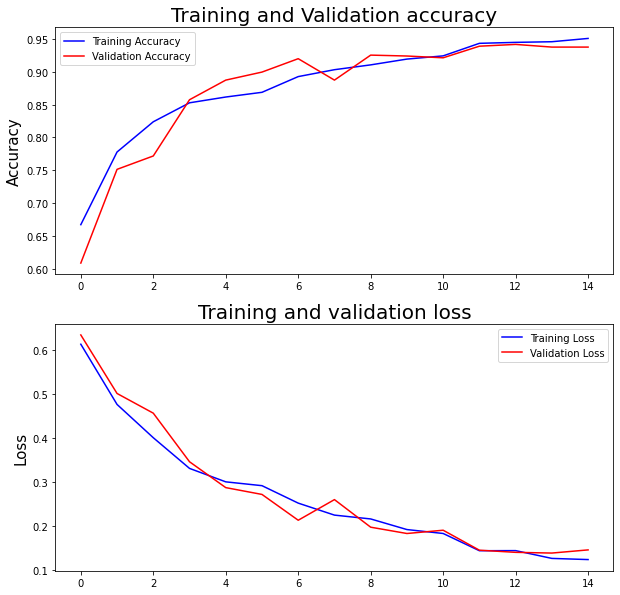

In [8]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
fig1 = fig.add_subplot(2,1,1)
fig2 = fig.add_subplot(2,1,2)

fig1.plot(accuracy, label='Training Accuracy', color='Blue')
fig1.plot(val_accuracy, label='Validation Accuracy', color='Red')
fig1.set_title("Training and Validation accuracy", fontsize=20)
fig1.set_ylabel("Accuracy", fontsize=15)
fig1.legend()

fig2.plot(loss, label='Training Loss', color='Blue')
fig2.plot(val_loss, label='Validation Loss', color='Red')
fig2.set_title("Training and validation loss", fontsize=20)
fig2.set_ylabel("Loss", fontsize=15)
fig2.legend()

plt.show()

In [9]:
model.save('/content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Datasets/facemask/Data/assets


In [10]:
model.save('model.h5')